In [5]:
import pandas as pd
football = pd.read_csv('sample.csv')
football.head()

,Player,Pos,Age,matches played,Goals,Shots,Shots on target,Shots on target%,Total Cmp,Total Att,Total Cmp%,Key passes
0,Marc-André ter Stegen,GK,30,38,0,0,0,0.0,1193,1412,84.5,3
1,Robert Lewandowski,FW,33,34,23,134,56,41.8,602,793,75.9,35
2,Gavi,"MF,FW",17,36,2,28,8,28.6,1026,1206,85.1,38
3,Alejandro Balde,DF,18,33,1,19,4,21.1,1482,1670,88.7,22
4,Frenkie de Jong,MF,25,33,2,18,10,55.6,2089,2320,90.0,45


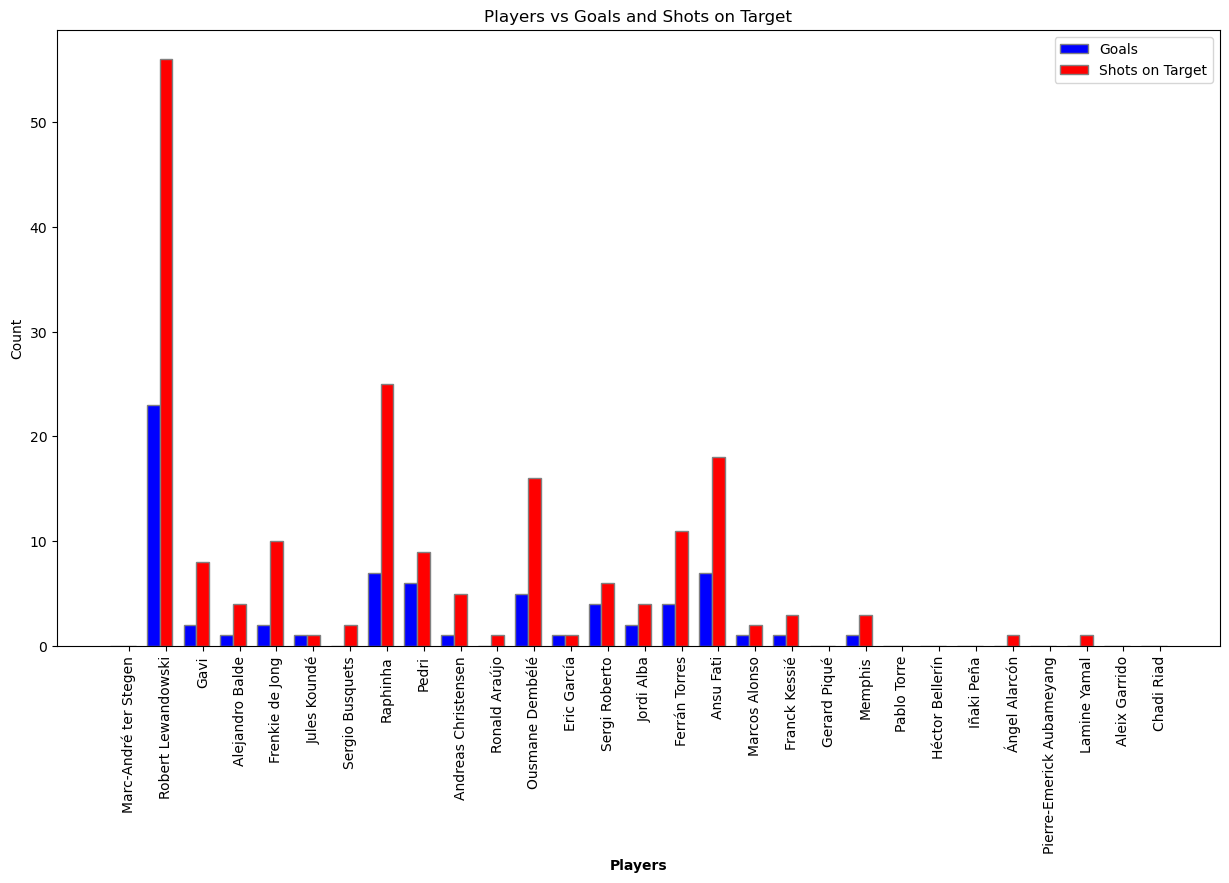

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting a bar graph for Players vs Goals and Shots on Target
plt.figure(figsize=(15, 8))
bar_width = 0.35

# Setting the position of the bars on the X-axis
r1 = range(len(football))
r2 = [x + bar_width for x in r1]

# Making the plot
plt.bar(r1, football['Goals'], color='blue', width=bar_width, edgecolor='grey', label='Goals')
plt.bar(r2, football['Shots on target'], color='red', width=bar_width, edgecolor='grey', label='Shots on Target')

# Adding labels
plt.xlabel('Players', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(football))], football['Player'], rotation=90)
plt.ylabel('Count')
plt.title('Players vs Goals and Shots on Target')

# Create legend & Show graphic
plt.legend()
plt.show()


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

attacking_metrics = ['Goals', 'Shots', 'Shots on target', 'Shots on target%', 'Key passes']
attacking_data = football[attacking_metrics]



In [23]:
football.describe()

,Age,matches played,Goals,Shots,Shots on target,Shots on target%,Total Cmp,Total Att,Total Cmp%,Key passes,Cluster
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,24.620690,20.206897,2.379310,19.655172,6.448276,26.831034,734.241379,852.586207,82.586207,15.482759,0.758621
std,5.857924,13.557758,4.530955,29.271239,11.378508,26.768226,628.221052,709.726029,17.638771,17.356803,0.510964
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,4.000000,0.000000,1.000000,0.000000,0.000000,77.000000,96.000000,80.200000,1.000000,0.000000
50%,25.000000,24.000000,1.000000,10.000000,2.000000,28.600000,642.000000,854.000000,86.300000,6.000000,1.000000
75%,30.000000,33.000000,2.000000,19.000000,8.000000,33.300000,1193.000000,1412.000000,90.000000,25.000000,1.000000
max,35.000000,38.000000,23.000000,134.000000,56.000000,100.000000,2089.000000,2320.000000,100.000000,57.000000,2.000000


C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

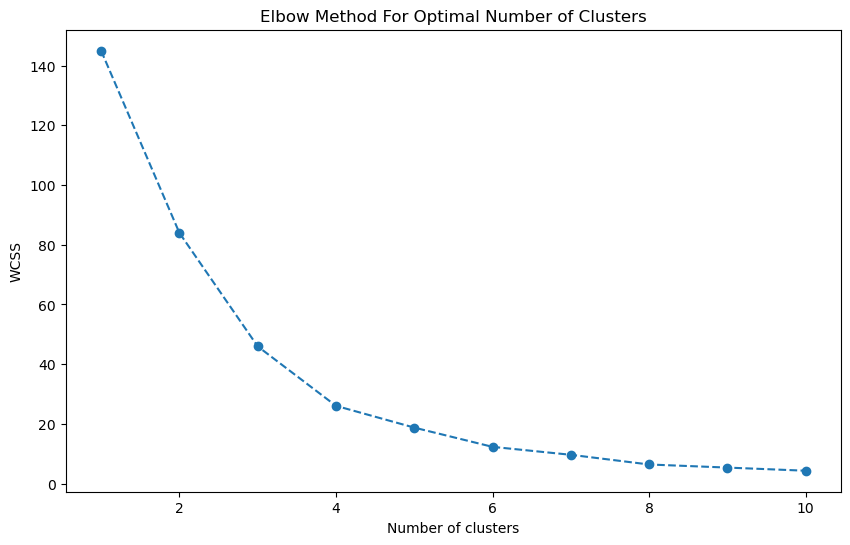

In [10]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(attacking_data)

# Using the Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [18]:
# Selecting a reasonable number of clusters (3 in this case)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original dataframe
football['Cluster'] = cluster_labels

# Displaying a sample of the dataframe with the cluster labels


# Extracting and displaying data for players in Cluster 1 and Cluster 2
cluster_0_data = football[football['Cluster'] == 0][['Player', 'Cluster']]
cluster_1_data = football[football['Cluster'] == 1][['Player', 'Cluster']]
cluster_2_data = football[football['Cluster'] == 2][['Player', 'Cluster']]

print(cluster_0_data)
print(cluster_1_data)
print(cluster_2_data)

             Player  Cluster
2              Gavi        0
4   Frenkie de Jong        0
7          Raphinha        0
8             Pedri        0
11  Ousmane Dembélé        0
14       Jordi Alba        0
15    Ferrán Torres        0
16        Ansu Fati        0
                       Player  Cluster
0       Marc-André ter Stegen        1
3             Alejandro Balde        1
5                Jules Koundé        1
6             Sergio Busquets        1
9         Andreas Christensen        1
10              Ronald Araújo        1
12                Eric García        1
13              Sergi Roberto        1
17              Marcos Alonso        1
18              Franck Kessié        1
19               Gerard Piqué        1
20                    Memphis        1
21                Pablo Torre        1
22            Héctor Bellerín        1
23                 Iñaki Peña        1
24              Ángel Alarcón        1
25  Pierre-Emerick Aubameyang        1
26               Lamine Yamal        

C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


football_numeric = football.select_dtypes(include=['number'])

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(football_numeric)

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X_scaled)

# Adding the cluster labels to the DataFrame
football['Cluster'] = cluster_labels

# Displaying the players and their respective clusters
clustered_data = football[['Player', 'Cluster']].sort_values(by='Cluster')
print(clustered_data)  # Displaying first 10 rows for a glimpse into the clusters

                       Player  Cluster
28                 Chadi Riad        0
26               Lamine Yamal        0
25  Pierre-Emerick Aubameyang        0
24              Ángel Alarcón        0
23                 Iñaki Peña        0
22            Héctor Bellerín        0
21                Pablo Torre        0
20                    Memphis        0
19               Gerard Piqué        0
27              Aleix Garrido        0
18              Franck Kessié        1
17              Marcos Alonso        1
16                  Ansu Fati        1
15              Ferrán Torres        1
0       Marc-André ter Stegen        1
12                Eric García        1
11            Ousmane Dembélé        1
10              Ronald Araújo        1
9         Andreas Christensen        1
8                       Pedri        1
7                    Raphinha        1
6             Sergio Busquets        1
5                Jules Koundé        1
4             Frenkie de Jong        1
3             Alejandro B

C:\Conda5\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


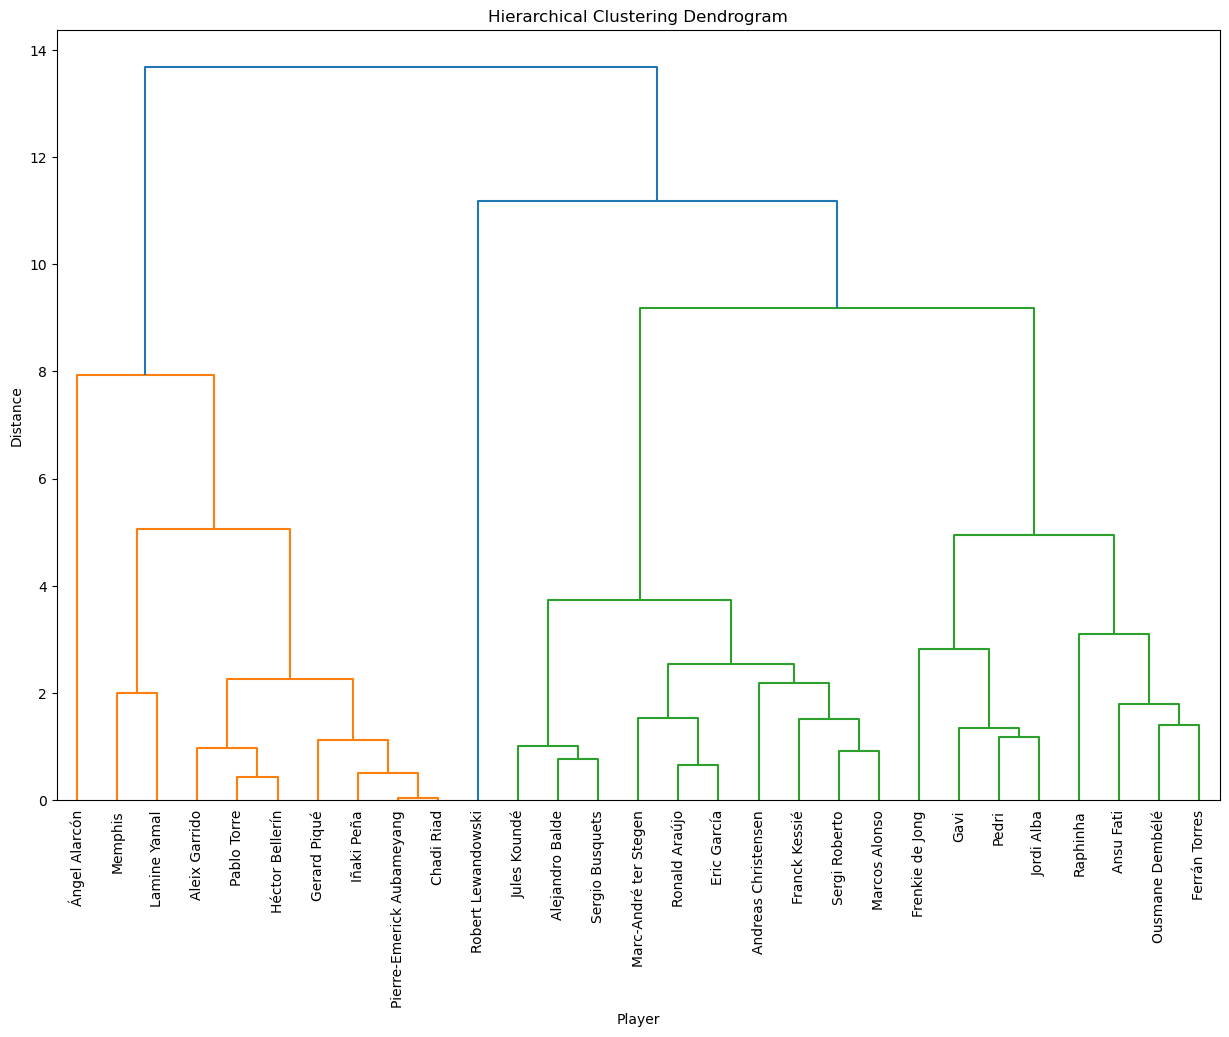

In [22]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=football['Player'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Player')
plt.ylabel('Distance')
plt.show()